In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

In [4]:
xtrain = xtrain.reshape(-1,28,28,1)/255.0
xtest = xtest.reshape(-1,28,28,1)/255.0
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest,num_classes=10)

In [5]:
def build_model(dropout_rate=0.0, learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPool2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPool2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),  # Adding dropout layer
        Dense(10, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
drop_rates = [0.0,0.2,0.5]
learning_rates = [0.001,0.0001]

C:\Users\Purvesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


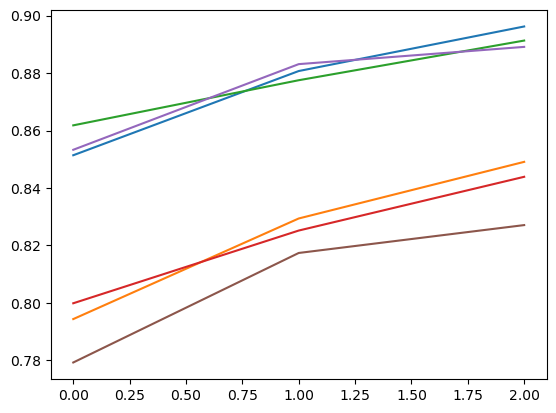

In [7]:
results = {}
for dropout_rate in drop_rates:
    for learning_rate in learning_rates:
        model = build_model(dropout_rate, learning_rate)
        history = model.fit(xtrain, ytrain, epochs=3, batch_size=64, validation_data=(xtest, ytest), verbose=0)
        loss, accuracy = model.evaluate(xtest, ytest, verbose=0)
        results[(dropout_rate, learning_rate)] = {
            'history': history.history,
            'loss': loss,
            'accuracy': accuracy
        }

        # Plot training history and compare model performance
        plt.plot(history.history['val_accuracy'], label=f"Dropout={dropout_rate}, LR={learning_rate}")

plt.show()

In [8]:
for key, result in results.items():
    dropout_rate, learning_rate = key
    print(f"Dropout={dropout_rate}, LR={learning_rate}: Validation Loss={result['loss']}, Validation Accuracy={result['accuracy']}")

Dropout=0.0, LR=0.001: Validation Loss=0.28932085633277893, Validation Accuracy=0.8962000012397766
Dropout=0.0, LR=0.0001: Validation Loss=0.42596402764320374, Validation Accuracy=0.8490999937057495
Dropout=0.2, LR=0.001: Validation Loss=0.3019283413887024, Validation Accuracy=0.8913000226020813
Dropout=0.2, LR=0.0001: Validation Loss=0.43137088418006897, Validation Accuracy=0.8439000248908997
Dropout=0.5, LR=0.001: Validation Loss=0.30689749121665955, Validation Accuracy=0.8891000151634216
Dropout=0.5, LR=0.0001: Validation Loss=0.4645829200744629, Validation Accuracy=0.8270999789237976
